In [1]:
import numpy as np
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

%matplotlib inline

## Use matlotlib colors

In [2]:
colors = [f'C{i}' for i in range(3)]

## Make fake data

In [3]:
T = np.arange(10, 65+1, 5)
Tc = 55
t = (Tc-T)/Tc
t[t<0] = 0
r = 0.7*np.sqrt(t)
r[np.isnan(r)] = 0
r += 0.05*np.random.rand(T.size)

r_error = 0.03 + 0.01*np.random.rand(T.size)

fwhm = 0.04*erf( (T-Tc)/10 ) + 0.002*np.random.rand(T.size)

fwhm_error = 0.005 + 0.001*np.random.rand(T.size)


## Create figure

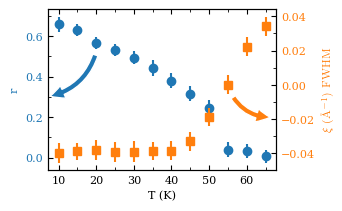

In [4]:
fig, axl = plt.subplots(figsize=(3+3/8, 2.3))

axl.errorbar(T, r, r_error, fmt='o', color=colors[0])

axr = axl.twinx()
axr.errorbar(T, fwhm, fwhm_error, fmt='s', color=colors[1])

axl.set_xlabel('T (K)')
axl.set_ylabel('r', color=colors[0])
axr.set_ylabel(r'$\xi$ (\AA{}$^{-1}$) FWHM', color=colors[1], usetex=True)

for ax, color in zip([axl, axr], colors):
    for t in ax.get_yticklabels():
        t.set_color(color)

fig.subplots_adjust(right=0.8, bottom=0.18)
axl.xaxis.set_major_locator(ticker.MultipleLocator(10))
axl.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axl.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
axr.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


arrow_l = patches.FancyArrowPatch(
        (20, 0.52),
        (7, 0.3),
        connectionstyle='arc3, rad=-0.3',
        mutation_scale=20, 
    facecolor=colors[0],
    edgecolor='w', 
    )

arrow_r = patches.FancyArrowPatch(
        (56, 0.31),
        (67, 0.2),
        connectionstyle='arc3, rad=0.3',
        mutation_scale=20, 
    facecolor=colors[1],
    edgecolor='w', 
    )

[axl.add_patch(arr) for arr in [arrow_l, arrow_r]]
fig.savefig('ex_06_two_axes.pdf', dpi=600)